In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install  wordcloud

     |████████████████████████████████| 220 kB 535 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158793 sha256=d097dc5e5a535edec3a31f00db1e13382d210a612b56e340c35861073405b60e
  Stored in directory: /Users/mefgate/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 471 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

     |████████████████████████████████| 25.3 MB 530 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
url = 'https://raw.githubusercontent.com/Rokhaya10/Association-Rules/main/Market_Basket_Optimisation.csv'

In [12]:
import squarify
import warnings
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
plt.style.use('default')

In [13]:
df = pd.read_csv('Market_Basket_Optimisation.csv')

In [14]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
transaction = []
for i in range(0, df.shape[0]):
    for j in range(0, df.shape[1]):
        transaction.append(df.values[i,j])

transaction = np.array(transaction)

In [16]:
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

In [17]:
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

In [18]:
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

In [19]:
df_table.head(10).style.background_gradient(cmap='Blues')

,items,incident_count
0,mineral water,1787
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,990
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [20]:
transaction = []
for i in range(df.shape[0]):
    transaction.append([str(df.values[i,j]) for j in range(df.shape[1])])
    
transaction = np.array(transaction)

In [21]:
top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

In [22]:
for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(df):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue

In [23]:
df_top20_multiple_record_check.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


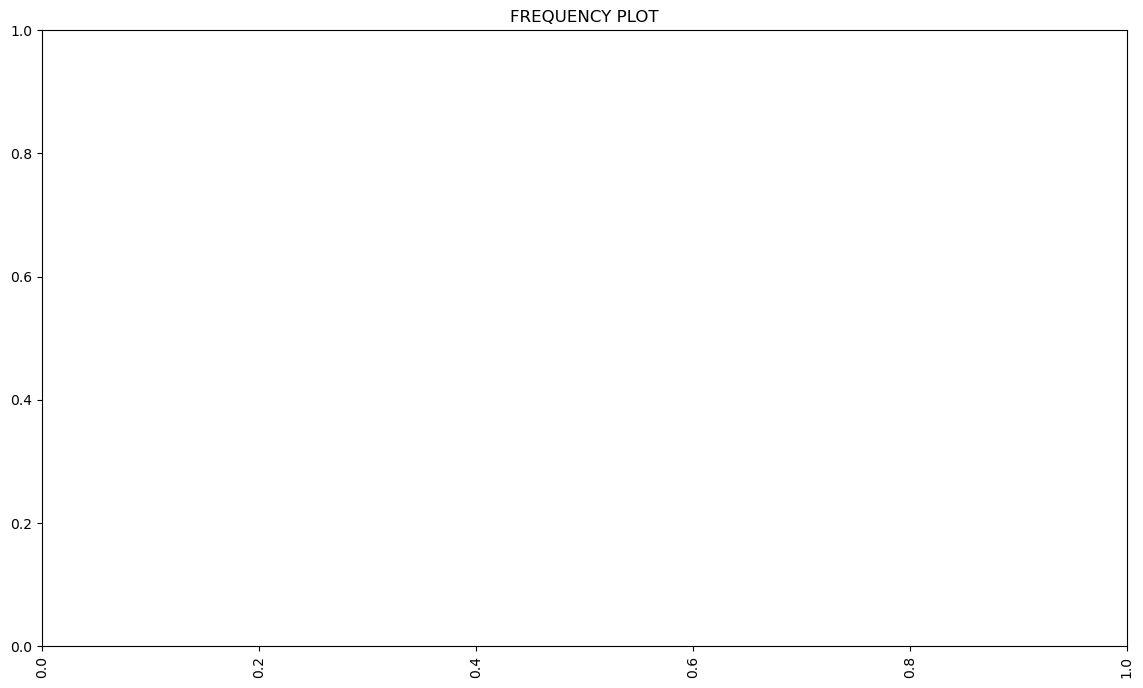

In [24]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
#df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

In [25]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [26]:
from mlxtend.preprocessing import TransactionEncoder

In [27]:
# Instantiate transaction encoder and fit in my list of sets data
encoder = TransactionEncoder().fit(transaction)

In [28]:
# Transform my actual data for a new representation
onehot = encoder.transform(transaction)

In [29]:
# Convert onehot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [30]:
onehot.iloc[:3]

,asparagus,1,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df.sum()

items             burgersmeatballseggschutneyturkeyavocadominera...
incident_count                                                29343
dtype: object

In [32]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array

transaction = []
for i in range(df.shape[0]):
    transaction.append([str(df.values[i,j]) for j in range(df.shape[1])])
    
transaction = np.array(transaction)
transaction

array([['burgers', '1'],
       ['meatballs', '1'],
       ['eggs', '1'],
       ...,
       ['frozen smoothie', '1'],
       ['yogurt cake', '1'],
       ['low fat yogurt', '1']], dtype='<U20')

In [33]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,1,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29338,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29339,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29340,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29341,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [34]:
first50 = df_table["items"].head(50).values # Select Top50
dataset = dataset.loc[:,first50] # Extract Top50
dataset

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,ham,energy bar,energy drink,pepper,cereals,vegetables mix,muffins,oil,french wine,fresh tuna
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29338,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29339,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,ham,energy bar,energy drink,pepper,cereals,vegetables mix,muffins,oil,french wine,fresh tuna
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.060900,(mineral water),1
1,0.045939,(eggs),1
2,0.044508,(spaghetti),1
3,0.043690,(french fries),1
4,0.041918,(chocolate),1
5,0.033739,(green tea),1
6,0.033125,(milk),1
7,0.025117,(ground beef),1
8,0.024367,(frozen vegetables),1
9,0.024299,(pancakes),1


In [37]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length


In [38]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length


In [39]:
# We can create our rules by defining metric and its threshold.

# For a start, 
#      We set our metric as "Lift" to define whether antecedents & consequents are dependent our not.
#      Treshold is selected as "1.2" since it is required to have lift scores above than 1 if there is dependency.

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length


In [40]:
# Sort values based on confidence

rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length


In [41]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) & 
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length


In [42]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
